<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assignmnent05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pylab import plot, show
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

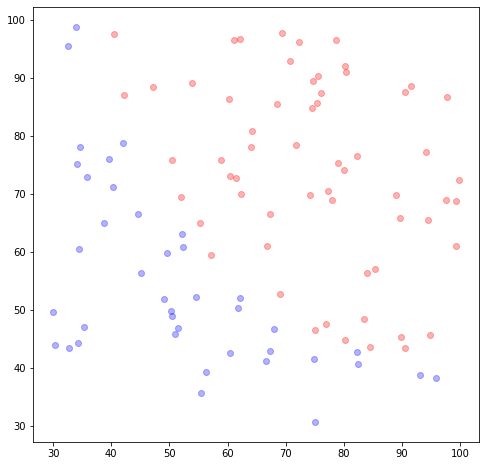

In [498]:
data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


# ***Logistic Regression_Functions***

In [0]:
def z_linear(theta,x,y): #[theta0,theta1,theta2] 로 구성된 theta
  return (theta[0]+theta[1]*x+theta[2]*y)

def h_function(theta,x,y):
  return (1/(1+np.exp((-1)*z_linear(theta,x,y))))

def objective_function(m,theta,data): #[x,y,i]로 구성된 data , [theta0,theta1,theta2]로 구성된 theta
  sum=0
  for i in range(0,m):
    if data[i][2]==0:
      sum=sum-np.log(1-h_function(theta,data[i][0],data[i][1]))
    elif data[i][2]==1:
      sum=sum-np.log(h_function(theta,data[i][0],data[i][1]))
  return (sum/m)

#Gradient Descent
def next_theta(m,a,theta,data):
  next_theta=[]
  sum=0
  for i in range(0,3):
    sum=0
    if i==0:
      for j in range(0,m):
        sum=sum+(h_function(theta,data[j][0],data[j][1])-data[j][2])
    else:
      for j in range(0,m):
        sum=sum+(h_function(theta,data[j][0],data[j][1])-data[j][2])*data[j][i-1]
    next_theta.append(theta[i]-a*(sum/m))
  return next_theta

  #Gradient
def gradient(theta,m,data):
  theta_count=len(theta)
  total=0
  sum=[]
  sum_temp=0
  for i in range(0,theta_count):
    sum_temp=0
    if i==0:
      for j in range(0,m):
        sum_temp=sum_temp+(h_function(theta,data[j][0],data[j][1])-data[j][2])
    else:
      for j in range(0,m):
        sum_temp=sum_temp+(h_function(theta,data[j][0],data[j][1])-data[j][2])*data[j][i-1]
    sum.append(np.square(sum_temp))
  for i in range(0,len(sum)):
    total=total+sum[i]
  return np.sqrt(total/m)

# ***Logistic Regression_Variables***

In [0]:
m=len(data)
a=0.0003
objective=[]
#values of cost function results
theta=[]
#theta0, theta1, theta2
i=0
theta_temp=[0.01,0.01,0.01]

# ***Gradient Descenting***

In [0]:
while gradient(theta_temp,m,data)>1:
  objective.append(objective_function(m,theta_temp,data))
  theta.append(theta_temp)
  theta_temp=next_theta(m,a,theta_temp,data)
  i=i+1

In [0]:
theta_0=[]
for i in range(0,len(theta)):
  theta_0.append(theta[i][0])
theta_1=[]
for i in range(0,len(theta)):
  theta_1.append(theta[i][1])
theta_2=[]
for i in range(0,len(theta)):
  theta_2.append(theta[i][2])

# ***Plot the estimated parameters***

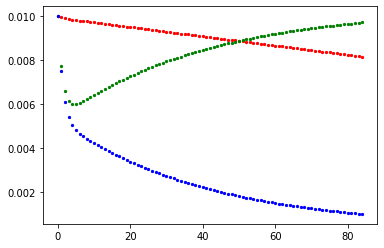

In [503]:
plt.scatter(range(0,i+1),theta_0,c='#ff0000',s=5)
plt.scatter(range(0,i+1),theta_1,c='#008000',s=5)
plt.scatter(range(0,i+1),theta_2,c='#0000ff',s=5)

# ***Plot the training error***

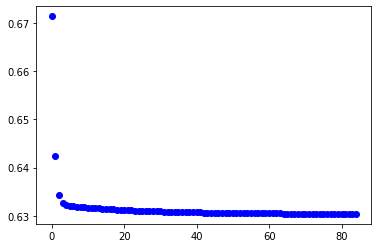

In [504]:
plt.scatter(range(0,i+1),objective,c="#0000ff")

# ***Plot the obtained classifier***

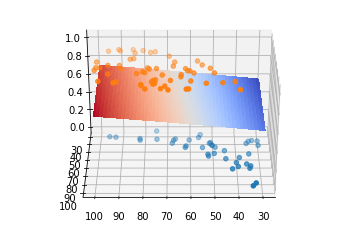

In [513]:
fig=plt.figure()
ax=fig.gca(projection='3d')
#make data
x=np.arange(30,100,0.5)
y=np.arange(30,100,0.5)
x,y=np.meshgrid(x,y)
z=h_function(theta_temp,x,y)

surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                     linewidth=0,antialiased=False)
ax.scatter(x_label0,y_label0,0)
ax.scatter(x_label1,y_label1,1)
ax.view_init(30,90)
plt.show()